In [11]:
#pip install descartes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
data_confirmed = pd.read_csv(url_confirmed)
data_deths = pd.read_csv(url_deths)
data_recovered = pd.read_csv(url_recovered)

days=data_confirmed.shape[1]-4

print("matrix shape:" ,data_confirmed.shape)
data_confirmed.head(5)

matrix shape: (273, 387)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086


total confirmed:  2636.738 k
total deths:  91.273 k
total recovered:  2118.441 k


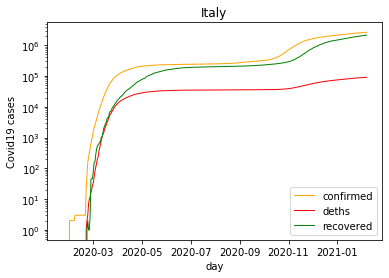

In [8]:
country='Italy'

confirmedC = data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
dethsC = data_deths.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
recoveredC = data_recovered.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]

df=pd.DataFrame({'x':pd.date_range("01/22/20",periods=days),'yy1':confirmedC.values,'yy2':dethsC.values,'yy3':recoveredC.values})
# multiple line plot
plt.plot( 'x', 'yy1', data=df, marker='', color='orange', linewidth=1,label="confirmed")
plt.plot( 'x', 'yy2', data=df, marker='', color='red', linewidth=1,label="deths")
plt.plot( 'x', 'yy3', data=df, marker='', color='green', linewidth=1,label="recovered")
plt.legend()
plt.yscale("log")
plt.xlabel('day')
plt.ylabel('Covid19 cases')
plt.title(country)

print("total confirmed: ", confirmedC.iloc[days-1]/1000,'k')
print("total deths: ", dethsC.iloc[days-1]/1000,'k')
print("total recovered: ", recoveredC.iloc[days-1]/1000,'k')

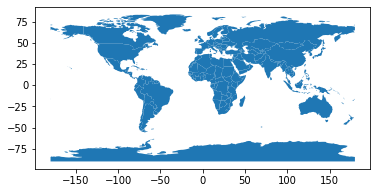

In [9]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
map_world = gpd.read_file(shapefile)[['ADMIN','geometry']]
#Rename columns.
#gdf.columns = ['Country/Region','geometry']
#gdf.head(5)

#print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
#gdf = gdf.drop(gdf.index[159])
map_world.plot()

In [22]:
confirmedT=data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1)
confirmedT

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335
Albania,0,0,0,0,0,0,0,0,0,0,...,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336
Algeria,0,0,0,0,0,0,0,0,0,0,...,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088
Andorra,0,0,0,0,0,0,0,0,0,0,...,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251
Angola,0,0,0,0,0,0,0,0,0,0,...,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601
Yemen,0,0,0,0,0,0,0,0,0,0,...,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127


In [ ]:
#Merge dataframes gdf and confirmedT.
gdf.merge(confirmedT,left_on = 'Country/Region')